# Movie Classification

## 1. Web Scrapping

ทำการ Scrape โดยเลือกประเภทหนังเป็น Feature Film ในประเทศอเมริกา ตั้งแต่ปี 2018 ถึง 2021

In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
page_movie = []

for i in [2018, 2019, 2020, 2021]:
    for j in range(1, 4200, 100):
        url = "https://www.imdb.com/search/title/?title_type=feature&release_date="+str(i)+"-01-01,"+str(i)+"-12-31&countries=us&sort=alpha,asc&count=100&start="+str(j)+"&ref_=adv_nxt"
        response = get(url)
        html_soup = BeautifulSoup(response.text, 'html.parser')
        movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

        names = []
        years = []
        genres = []
        descriptions = []

        for container in movie_containers:

            if (container.find('span', attrs = {'class': 'genre'}) is not None) and ((container.find_all('p', attrs={'class':'text-muted'})[-1].text) != '\nAdd a Plot\n'):

                name = container.h3.a.text
                names.append(name)

                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                genre = container.find('span', attrs = {'class': 'genre'}).text
                genres.append(genre)

                description = container.find_all('p', attrs={'class':'text-muted'})[-1].text
                descriptions.append(description)
        test_df = pd.DataFrame({'movie': names,
                           'year': years,
                           'genres': genres,
                           'descriptions': descriptions})
        page_movie.append(test_df)

In [3]:
page_movie[0]

,movie,year,genres,descriptions
0,#1915House,(2018),"\nHorror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,(2018),"\nDrama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,(2018),"\nAction, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,(2018),\nDrama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",(2018),\nMystery,"\nA low budget but slick ""who done it"" involvi..."
...,...,...,...,...
82,A Motion Selfie,(2018),"\nBiography, Comedy, Drama","\n""A Motion Selfie"" is one-of-a-kind DIY filmm..."
83,A Murder of Innocence,(2018),\nCrime,"\nBased on a true story, a community is rocked..."
84,A Natural Disaster,(2018),\nDrama,\n24 hours after an earthquake shakes Los Ange...
85,A Nice Quiet Life,(2018),"\nDrama, Romance",\nTwo college students fall in love one year b...


In [4]:
df = pd.concat(page_movie).reset_index(drop=True)
df

,movie,year,genres,descriptions
0,#1915House,(2018),"\nHorror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,(2018),"\nDrama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,(2018),"\nAction, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,(2018),\nDrama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",(2018),\nMystery,"\nA low budget but slick ""who done it"" involvi..."
...,...,...,...,...
12369,Zo in Exile,(2021),\nFantasy,\nZo and friends venture off for a weekend get...
12370,Zone Drifter,(2021),\nSci-Fi,"\nIn the distant future, a former soldier batt..."
12371,Zooey,(2021),"\nComedy, Drama, Sci-Fi","\nWhen a young boy, Noah, meets Zooey, a young..."
12372,Zwtral,(2021),\nMystery,\nMaking trades is his life. Justin finds hims...


## 2. Data Preparation

### year

In [5]:
df.year.unique()

array(['(2018)', '(I) (2018)', '', '(II) (2018)', '(III) (2018)',
       '(IV) (2018)', '(V) (2018)', '(IX) (2018)', '(XXIII)',
       '(VI) (2018)', '(VIII) (2018)', '(2019)', '(VII)',
       '(XVIII) (2018)', '(I)', '(II)', '(XVI) (2018)', '(II) (2019)',
       '(I) (2019)', '(IV) (2019)', '(V) (2019)', '(III) (2019)',
       '(VI) (2019)', '(VIII) (2019)', '(XXXV) (2019)', '(VII) (2019)',
       '(X) (2019)', '(IX) (2019)', '(XII) (2019)', '(2020)',
       '(III) (2020)', '(II) (2020)', '(I) (2020)', '(XXI) (2020)',
       '(V) (2020)', '(VI) (2020)', '(IV) (2020)', '(2021)',
       '(VIII) (2020)', '(XI) (2020)', '(I) (2021)', '(II) (2021)',
       '(IV) (2021)', '(XII) (2021)', '(III) (2021)', '(VI) (2021)',
       '(V) (2021)', '(VI)'], dtype=object)

In [6]:
df.year = df.year.str.extract('(\d+)')
df.year = df.year.ffill(axis = 0)
df.year.unique()

array(['2018', '2019', '2020', '2021'], dtype=object)

In [7]:
df.groupby(['year']).size().reset_index(name='count')

,year,count
0,2018,3359
1,2019,2907
2,2020,2929
3,2021,3179


In [8]:
df.genres = df.genres.str.strip()
df.head()

,movie,year,genres,descriptions
0,#1915House,2018,"Horror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,2018,"Drama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,2018,"Action, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,2018,Drama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"\nA low budget but slick ""who done it"" involvi..."


In [18]:
#df.to_pickle('df.pickle')
df = pd.read_pickle('df.pickle')
df.head()

,movie,year,genres,descriptions
0,#1915House,2018,"Horror, Thriller",\nA century of secrets are hidden behind the f...
1,#SquadGoals,2018,"Drama, Thriller","\nSamantha is a serious journalist, both for t..."
2,#Victoria,2018,"Action, Drama",\nVictoria moves from out of town into the poo...
3,1 Angry Black Man,2018,Drama,\nMike Anderson is a senior at the quintessent...
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"\nA low budget but slick ""who done it"" involvi..."


In [19]:
import nltk
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [20]:
all_genres = df.genres.tolist()
all_genres = ", ".join(all_genres)
all_genres = sorted(list(set(all_genres.split(", "))))
all_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [21]:
for g in all_genres:
  df[g] = df["genres"].apply(lambda x: 1 if len(set(x.split(", ")).intersection(set([g]))) > 0 else 0)

In [22]:
df.descriptions = df.descriptions.str.strip()
df.descriptions = df.descriptions.str.replace('...                See full summary\xa0»', '')
df.descriptions = df.descriptions.str.lower()
df.head()


<ipython-input-22-fa39b8d42ac5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.descriptions = df.descriptions.str.replace('...                See full summary\xa0»', '')


,movie,year,genres,descriptions,Action,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,#1915House,2018,"Horror, Thriller",a century of secrets are hidden behind the fre...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,#SquadGoals,2018,"Drama, Thriller","samantha is a serious journalist, both for the...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,#Victoria,2018,"Action, Drama",victoria moves from out of town into the poor ...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1 Angry Black Man,2018,Drama,mike anderson is a senior at the quintessentia...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"1 Dead man, 6 Suspects, $65 Million",2018,Mystery,"a low budget but slick ""who done it"" involving...",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
def stopword_removal(x, stpws=stopwords.words("english")):
  return list(set(x).difference(set(stpws)))

def lemmatization(x, stemmer=PorterStemmer()):
  return [stemmer.stem(i) for i in x]

def number_removal(x):
  return [i for i in x if not i.isnumeric()]

In [24]:
df["corpus"] = df["descriptions"].apply(lambda x: word_tokenize(x))
df["corpus"] = df["corpus"].apply(lambda x: stopword_removal(x))
df["corpus"] = df["corpus"].apply(lambda x: lemmatization(x))
df["corpus"] = df["corpus"].apply(lambda x: number_removal(x))
df["corpus"] = df["corpus"].apply(lambda x: " ".join(x))
corpus = df["corpus"].tolist()


In [25]:
corpus

["secret layer back let peel hidden might centuri till . fresh 's see behind someth modern late , paint addit escap",
 "rudi journalist scholarship . gillian samantha school vy colleg 's nate paper , full-rid local seriou friend yearbook",
 'new goe answer seek citi neighborhood move reveng victoria . york father poor journey town inner justic , dealer drug',
 'particular graduat eight . day school away colleg art senior mike frost anderson week , liber quintessenti new-england',
 "done famili '' businessman involv budget `` long list low suspect includ murder . attorney slick assort butler greedi shadi wealthi ,",
 'life mayb revis year . lissa pregnant , old',
 'detox realiz struggl . face problem go group island , friend togeth',
 'three other ) intellig shift spi man mysteri . live parallel artist whim ( , version scientist',
 "black younger partner/lov jame ralphi parti detect morri valdez undercov . 's hunt status.111 n.y.p.d member feder compromis panther brother",
 'new deploy 

## Topic Modeling

* https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/
* https://www.kaggle.com/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn
* https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
* https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
* https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

## TFIDF Vetorization

In [26]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
X = tfidf.toarray()
y = df.iloc[:, 4:28].values

In [12]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Classification without LDA

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
filename = 'rf_withoutLDA.sav'
pickle.dump(rf, open(filename, 'wb'))
rf = pickle.load(open(filename, 'rb'))

In [32]:
y_pred = rf.predict(X_test)

In [94]:
f1 = []
for i in range(X_test.shape[0]):
  f1.append(f1_score(y_test[i], y_pred[i]))
f1

In [33]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
# print("10CV score:", cross_val_score(rf, X_train, y_train, cv=10))
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Accuracy score: 0.17696969696969697
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       291
           1       0.00      0.00      0.00       156
           2       0.40      0.02      0.04        94
           3       0.00      0.00      0.00        53
           4       0.92      0.09      0.17       603
           5       0.00      0.00      0.00       201
           6       0.61      0.62      0.62      1031
           7       0.75      0.03      0.06       104
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00        35
          11       0.81      0.27      0.41       492
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00       132
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00  

C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LDA

### How to find the optimal number of topics for LDA?

### Modelling LDA 

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=42)
X_train_lda = lda.fit_transform(X_train)
X_test_lda = lda.transform(X_test)

In [40]:
X_train_lda.shape

(9899, 10)

In [41]:
X_train_lda

array([[0.02651148, 0.02651162, 0.02651089, ..., 0.02651292, 0.02652092,
        0.02651164],
       [0.02369764, 0.02369691, 0.02369846, ..., 0.02369868, 0.02370058,
        0.02369732],
       [0.02281506, 0.02281557, 0.02281493, ..., 0.02281607, 0.79465858,
        0.02281524],
       ...,
       [0.02035867, 0.02035872, 0.02035688, ..., 0.02035902, 0.02036237,
        0.1692839 ],
       [0.02141393, 0.02141454, 0.02141422, ..., 0.02141509, 0.80726578,
        0.02141447],
       [0.02053268, 0.81517389, 0.02053206, ..., 0.02053395, 0.02053933,
        0.02053689]])

In [44]:
print("Description 19: ")
for i, topic in enumerate(X_train_lda[18]):
  print("Topic ", i, ": ", topic*100, "%")


Description 19: 
Topic  0 :  2.0766357086933063 %
Topic  1 :  2.076527507380012 %
Topic  2 :  2.076547218011987 %
Topic  3 :  2.0765886757472596 %
Topic  4 :  2.076456351220886 %
Topic  5 :  81.30886249468354 %
Topic  6 :  2.077635078956689 %
Topic  7 :  2.0770589293240618 %
Topic  8 :  2.0771650124118053 %
Topic  9 :  2.076523023570468 %


In [45]:
lda_components = lda.components_
terms = vectorizer.get_feature_names()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:7]
    top_terms_list = list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ", top_terms_list)


Topic 0:  ['stori', 'horror', 'film', 'around', 'time', 'basebal', 'school']
Topic 1:  ['stori', 'love', 'follow', 'life', 'ag', 'world', 'film']
Topic 2:  ['wreak', 'havoc', 'wrap', 'one', 'year', 'modern', 'friend']
Topic 3:  ['film', 'dump', 'movi', 'comedi', 'product', 'seri', 'moment']
Topic 4:  ['base', 'stori', 'cure', 'unsettl', 'unthink', 'human', 'day']
Topic 5:  ['friend', 'colleg', 'find', 'two', 'year', 'young', 'take']
Topic 6:  ['find', 'young', 'man', 'famili', 'friend', 'woman', 'life']
Topic 7:  ['new', 'love', 'life', 'find', 'young', 'friend', 'stori']
Topic 8:  ['life', 'young', 'man', 'find', 'year', 'live', 'one']
Topic 9:  ['life', 'man', 'girl', 'love', 'stori', 'year', 'father']


In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate a word cloud image for given topic


def draw_word_cloud(index):
  imp_words_topic = ""
  comp = lda.components_[index]
  vocab_comp = zip(terms, component)
  sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic = imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure(figsize=(5, 5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


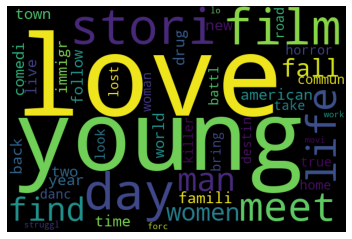

In [61]:
draw_word_cloud(4)


## Classification with LDA

In [46]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rf_lda = RandomForestClassifier(random_state=42)
rf_lda.fit(X_train_lda, y_train)
y_pred_lda = rf_lda.predict(X_test_lda)
print('Accuracy score: ' + str(accuracy_score(y_test, y_pred_lda)))
print(classification_report(y_test, y_pred_lda))


Accuracy score: 0.06343434343434344
              precision    recall  f1-score   support

           0       0.16      0.03      0.05       291
           1       0.14      0.02      0.03       156
           2       0.22      0.02      0.04        94
           3       0.00      0.00      0.00        53
           4       0.31      0.07      0.12       603
           5       0.07      0.01      0.02       201
           6       0.46      0.31      0.37      1031
           7       0.17      0.02      0.03       104
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00        35
          11       0.22      0.06      0.10       492
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        40
          14       0.06      0.01      0.01       132
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00  

C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
xgb_lda = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_lda = MultiOutputClassifier(xgb_lda)
xgb_lda.fit(X_train_lda, y_train)
y_pred_lda = xgb_lda.predict(X_test_lda)

print('Accuracy score: ' + str(accuracy_score(y_test, y_pred_lda)))
print(classification_report(y_test, y_pred_lda))


C:\Users\SUNG\anaconda3\lib\site-packages\xgboost\data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[20:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SUNG\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
